<a href="https://colab.research.google.com/github/ForoutanNeda/bestoon/blob/master/Feed_forward_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NNTI 19/20 Project 1:  PCA and Logistic Regression**

## **Deadline: 17 December 2019, 23:59**


---



**Important:** For all computations in this project, please use the torch library. The torch package contains data structures for multi-dimensional tensors and mathematical operations over these are defined. Additionally, it provides many utilities for efficient serializing of Tensors and arbitrary types, and other useful utilities.

# **1. Principal component analysis (PCA) [12 points]**

Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. PCA is also a very useful dimesnionality reduction technique. In the folowing, we explore how to apply PCA on the CIFAR dataset.

CIFAR 10 is a collection images which is commonly used to train machine learning and computer vision algorithms. This dataset contains 50000 training images and 10000 validation images such that the images can be classified between 10 different classes.  The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

**Task 1. Getting the dataset using torchvision**

Torchvision is a pytorch package which helps in loading datasets in the image domain. It has dataloaders for common datasets like CIFAR 10, MNIST etc. Complete the code below to download the CIFAR dataset using torchvision. Torchvision returns the dataset in which every image is stretched out into a 3072-dimensional row vector.

Complete the code below to load the CIFAR dataset using torchvision. Print the labels and some images with the corresponding labels.
[1.5 points]

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:02, 68262932.09it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data


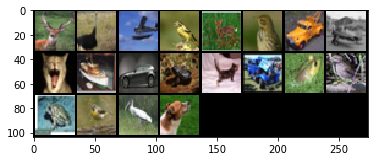

In [0]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# TODO: define transformation function using torchvision.transforms to convert images into pytorch tensors
transform = transforms.Compose([transforms.ToTensor()])
#, transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

# TODO: use torchvision.datasets to load CIFAR-10 train dataset and the defined transform
train_dataset = datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)

# TODO: use torch.utils.data.DataLoader to get a python Iterable over the dataset, use batch_size = 20
train_loader = DataLoader(train_dataset, batch_size = 20, shuffle = True)

# TODO: get the first batch of images of the dataset using python Iterator
train_iter = iter(train_loader)
images, labels = train_iter.next()


# TODO: plot the first batch of images of the training dataset
grid = make_grid(images)
plt.imshow(np.transpose(grid.numpy(), (1, 2, 0)))

# the labels are numbered from 0 - 9 as follows
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

**Points**: $0.0$ of $1.5$
**Comments**: None

**Task 2. Centering and normalization** 

PCA is applied on data after centering and normalization.
Complete the functions below to center and normalize the images. 

[1 point]

In [0]:
def center(images):
    # TODO : substract the mean from the images
    centered_images = images - images.mean(axis = 0) 
    #X_mean = torch.mean(X,0)
    #X = X - X_mean.expand_as(X)
    return centered_images

def normalize(images):
    # TODO : normalize the centered images by dividing by the standard deviation
    normalized_images = images / images.std(axis = 0)
    return normalized_images

def transform(images):
  # reshaping the images as a 3072-dimensional row vector
  images = images.view((images.size()[0], 3072))
  images = center(images)
  images = normalize(images)
  return images

**Points**: $0.0$ of $1$
**Comments**: None

**Task 3. Implementing PCA** 

PCA takes in the data points and the target dimension which is lesser than the original dimension of the data. In this case, the data matrix is of [number of images, 3072]. 

The following presents the main steps to perform a slightly modified version of PCA. This function takes as input the original data points, and one of the two parameters: target_dim or target_variance. If target_dim is given then return the projected data into a target_dim-dimensional space. Otherwise, the function returns data projected into a low dimensional space which captures a ratio of target_variance from the data. 


1.   Trasnform the data by centering and normalizing the images
2.   Get the data matrix of shape [#images, #dimensions] 
3.   Compute the covariance matrix of the data matrix
4.   Compute the eigenvectors and eigenvalues of the covariance matrix
5.   Sort eigenvectors by decreasing eigenvalues
6.   If target_variance is given then compute the target_dim corresponding to it.
7.   Select the top target_dim eigenvectors to get the encoding matrix of shape [target_dim, #dimesnions]
6.   Multiply the data matrix with the encoding matrix to project the data into the low dimensional space

Complete the function below to implement PCA and return the reduced dimension set and captured variance.

[8 points]

In [0]:
'''
PCA function must take the original images and either the number of target
dimensions or the ratio of the total variance to be captured from the data

'''

def PCA(images, target_dim = 0, target_variance = 0): 
  # transform the data
  data = transform(images)

  # TODO : compute the covariance matrix of the data points
  cov = torch.mm(data.T, data) / (images.size()[0] -1)
  #print(cov[0:5,0:5])

  # TODO: compute the eigenvectors and eigenvalues of the covariance matrix
  w, lamb = torch.eig(torch.tensor(cov), True)  #w : eigenvalue  lamb : eigenvector
  
  
  # TODO: sort eigenvectors by decreasing eigenvalues
  idx = np.argsort(-w[:,0])
  w = w[idx]
  lamb = lamb[idx, :]

  # w_sort = w[torch.argsort(lamb, dim=0, descending=True)[:,0]]
  # lamb_sort = lamb[torch.argsort(lamb, dim=0, descending=True)[:,0]]
  #print(w[0:5,0:5])  #both sort were the same


  if(target_variance != 0):
    # TODO: compute target_dim such that target_variance is captured from the data
    s = sum(w[:, 0])
    temp =0
    target_dim = 0
    i =0
    while temp < target_variance * s and i<data.size()[0]:
      temp += w[i][0]
      target_dim += 1  
      i +=1   

  # TODO: choose $target_dim eigenvectors corresponding to the low dimensional subspace
  encoding_matrix = lamb[ :target_dim,:]
  #print(encoding_matrix[:5,:5])

  # TODO: multiply the data matrix with the encoding matrix to get the reduced dataset
  reduced_data = torch.mm(data,encoding_matrix.T)

  return reduced_data, target_dim, encoding_matrix
 

**Points**: $0.0$ of $8$
**Comments**: None

**Task 4. PCA for dimensionality reduction** 

PCA is normally used to bring to acheive dimensionality reduction for high       dimensional datasets. This is acheived by bringing the dataset into a low dimensional subspace while still capturing most of the variance in the dataset. Use the above function to reduce the dataset into a 50 dimensional subspace.  

[0.5 point]

In [0]:
# TODO : use dataloader with batch size 2000 to load the dataset
train_loader = DataLoader(train_dataset, batch_size = 2000, shuffle = True)
# TODO : apply PCA with target_d = 50 on the first batch (contains 2000 images) from the dataloader
train_iter = iter(train_loader)     
images, labels = train_iter.next()  
reduced_data = PCA(images, target_dim= 50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


In [0]:
print(images.size())
print(reduced_data[0].size())

torch.Size([2000, 3, 32, 32])
torch.Size([2000, 50])


**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 5. PCA for visualization**

PCA is often used for visualization purposes.  Visually exploring the data can become challenging when we have more than 3 features. But this can be a very useful tool when dealing with data related problems. 

Please followe the steps below and complete the folowing code to create a scatterplot of the first and second principal components. Make use of matplotlib for the following.

1.   Create a 2D scatter plot. For each data point, plot the first principle component on $x$ axis and the second principle component on $y$ axis, use different colors for each class.
2.   Set corresponding labels: assign label "first principle component" for $x$ axis and "second principle component" for $y$ axis.
3.   Add legends for each class.
 
Are the first two components discriminative enough to classify points from any pair of the ten classes ?
[1 point]

Are the first two components discriminative enough to classify points from any pair of the ten classes ?
No, the first two PCA components are not disciminative enough to seprate points from any pair of the ten classes. As we can see in the below plot, the points from all 10 classes are almost centered and mixed together.

torch.Size([2000])
torch.Size([2000, 50])


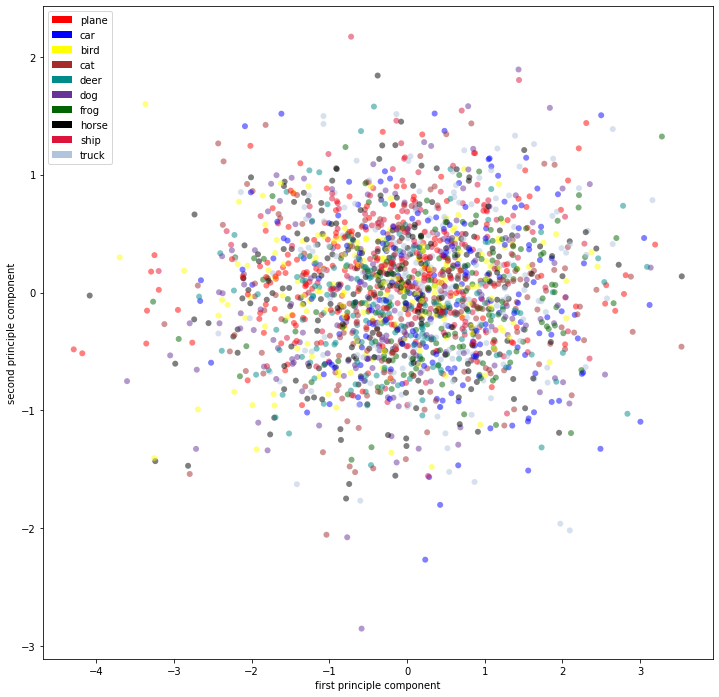

In [0]:
# create a scatterplot of the first two dimensions of the reduced data
import matplotlib.patches as Patch

projected_data = reduced_data[0]
print(labels.shape)
print(reduced_data[0].size())

color_dict = {classes[0]:"red", classes[1]:"blue", classes[2]: "yellow",
              classes[3]: "brown", classes[4]: "darkcyan", classes[5]: "rebeccapurple",
              classes[6]: "darkgreen" , classes[7]: "black", classes[8]: "crimson",
              classes[9]:"lightsteelblue" }

# for label in labels:   #does not work
#     la = classes[label.item()]
#     col = color_dict[la]

col = [color_dict[classes[label.item()]] for label in labels]   #change labels to correspondings collors

plt.figure(figsize=(12,12))
plt.scatter(projected_data[:,0], projected_data[:,1],c = col, edgecolor='', alpha=0.5)
plt.xlabel("first principle component"); plt.ylabel("second principle component")


recs=[]
for i in color_dict:
    recs.append(Patch.Rectangle((0,0),1,1,fc=color_dict[i]))
plt.legend(recs,classes,loc="upper left")

plt.show()


**Points**: $0.0$ of $1$
**Comments**: None


---



# **2. Logistic regression [18 points]**


Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In this section, we explore the binary logistic regression. We change the clsssification problem with 10 classes into a binary classification problem by considering only the points from the classes *'ship'* and *'car'*.

![Logistic regression image](https://drive.google.com/uc?id=1eRF1-2qnQYAkkCDpAwROj5MiMKzct2x0)


**Task 6. Generating training dataset** 

Since logistic regression is a classification problem with two classes, we need a labelled dataset with two classes as the training set. Complete the function to obtain the datapoints corresponding to labels *'ship'* and *'car'*. 

Please follow the steps below: 

1. Load the train and test sets of CIFAR 10 from torchvision using a batch size of 1024.
2. Split the training samples by 80:20 ratio into train set and validation set respectively. 
3. Filter the datasets to only have images with classes 'ship' or 'car'. The corresponding labels are 8 and 1 respectively.
4. The new labels for binary classification problem should be 'ship' : 0 and 'car': 1.
5. Define a [torch.utils.data.Dataset](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html) with the filtered tensors of images and the newly created labels.
6. Define a dataloader for training and validation datasets with batch_size 64.

[1.5 point]


In [0]:
# TODO : generate the train, validation, and test sets from CIFAR 10
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader,random_split
from torchvision.utils import make_grid
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset

#Load the train and test sets of CIFAR 10 from torchvision using a batch size of 1024.
batch_size = 1024
transform = transforms.Compose([transforms.ToTensor()])

tr_dataset = datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
test_dataset = datasets.CIFAR10(root='./data', train = False , download = True, transform = transform) 


# Filter the datasets to only have images with classes 'ship' or 'car'. The corresponding labels are 8 and 1 respectively.

indi = []
ta = []
im = []
for i,data in enumerate(tr_dataset):
  image,label = data
  if label == 8 or label == 1:
    ta.append(label)
    indi.append(i)
    im.append(image)

filter_train = torch.utils.data.Subset(tr_dataset, indi)

# The new labels for binary classification problem should be 'ship' : 0 and 'car': 1.
filter_train.targets = torch.tensor(ta)
filter_train.targets[filter_train.targets == 8]=0


# Define a torch.utils.data.Dataset with the filtered tensors of images and the newly created labels.
class data_set(Dataset):
  def __init__(self,pics,labels):
    self.targets = labels
    self.images = pics

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, index):
    image = self.images[index]
    label = self.targets[index]
    return image,label


#Define a torch.utils.data.Dataset for filter_train
filter_trainset = data_set(im,filter_train.targets)


#test filter
indi = []
ta = []
im = []
for i,data in enumerate(test_dataset):
  image,label = data
  if label == 8 or label == 1:
    ta.append(label)
    indi.append(i)
    im.append(image)
filter_test = torch.utils.data.Subset(test_dataset, indi)

# The new labels for binary classification problem should be 'ship' : 0 and 'car': 1.
filter_test.targets = torch.tensor(ta)
filter_test.targets[filter_test.targets == 8]=0

#Define a torch.utils.data.Dataset for filter_test
test_data = data_set(im,filter_test.targets)


test_loader = DataLoader(test_data, batch_size = batch_size , shuffle = True)




#Split the training samples by 80:20 ratio into train set and validation set respectively.
num_samples= len(filter_trainset)
lengths = [int(num_samples*0.8), int(num_samples*0.2)]
train, validation = random_split(filter_trainset, lengths)

indi = []
ta = []
im = []
for i,data in enumerate(train):
  image,label = data
  ta.append(label)
  indi.append(i)
  im.append(image)

training_data = data_set(im,ta)


indi = []
ta = []
im = []
for i,data in enumerate(validation):
  image,label = data
  ta.append(label)
  indi.append(i)
  im.append(image)

validation_data = data_set(im,ta)


batch=64
train_loader = DataLoader(training_data, batch_size = batch )
valid_loader = DataLoader(validation_data, batch_size = batch )


Files already downloaded and verified
Files already downloaded and verified


**Points**: $0.0$ of $1.5$
**Comments**: None

**Task 7. Get the dataset in the low dimensional subspace** 

Apply pca on the original data points to get new data matrix.
The target dimensions must capture 90% of the variance in the data.
Use the previously defined PCA function for this task. In the coming sections, we will be using this projected training dataset to training the logistic regression model.

[0.5 point]


In [0]:
# TODO : use the pca function defined in task 3 to reduce dimensions of the train set
images_data = torch.stack([train[i][0] for i in range(len(train))])
reduced_data = PCA(images_data, target_variance =0.9)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


In [0]:
#train_data
train_data = data_set(reduced_data[0], training_data.targets)
dim_fit = reduced_data[1]

In [0]:
ima_data = torch.stack([validation_data[i][0] for i in range(len(validation_data))])
reduced_valid = PCA(ima_data, target_dim = dim_fit)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


In [0]:
#validation_data
valid_data = data_set(reduced_valid[0],validation_data.targets)

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 8. Logistic regression hypothesis** 

In order to map predicted values to probabilities, logistic regression needs a function which returns values between 0 and 1. Logistic function is used in this case. This function maps any real value into another value between 0 and 1. In machine learning, it is also referred to as sigmoid and is used to map predictions to probabilities.

$f(x) = \frac{1}{1 + e^{-x}}$

![Image of logistic regression function](https://en.wikipedia.org/wiki/Logistic_function#/media/File:Logistic-curve.svg)

Complete the following function which returns the sigmoid of a given input. 

[0.5 point]


In [0]:
def sigmoid(x):  
  # TODO find and return the sigmoid of x
  s = 1/(1 + torch.exp(-1*x))
  return s

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 9. Loss function** 

A common loss function used when dealing with probabilities in binary classification is binary cross entropy loss.

$cross\_entropy\_loss(y, \hat y) = \frac{1}{N} \sum_{i=0}^{N} y\log \hat y_{i} + (1-y)\log (1 - \hat y_{i})$

For binary cross entropy loss, the number of classes is 2.

Read about cross entropy in this [link](https://en.wikipedia.org/wiki/Cross_entropy).

Complete the following function to return the binary cross entropy loss. 

[1 point]

In [0]:
def bce(y_true, y_pred):
  # TODO : compute mean binary cross entropy loss given a list of predicted and true labels
  N = len(y_true)
  for i in range(len(y_true)):
    if (y_pred[i].item() == 0.):
      y_pred[i] += 1e-6
    elif (y_pred[i].item() == 1.):
      y_pred[i] -= 1e-6
    else:
      pass

  bce_loss = -1 / N * (torch.sum( (y_true).T * torch.log(y_pred) + (1-y_true).T * torch.log(1-y_pred) ))

  return bce_loss

**Points**: $0.0$ of $1$
**Comments**: None

**Task 10. Gradient descent to minimize the loss** 

The logistic regression parameter need to be optimized to minimize the loss function.

We have the output of the logistic regression given a vector **x** as follows.

$f(x) = \frac{1}{1 + e^{-wx}}$

Complete the following function to calculate the gradient of binary cross entropy loss function with respect to the parameter w. 

[1 point]

In [0]:
def gradient(loss,weight):
  # TODO : compute and return the gradient of loss w.r.t the weight parameter
  weight.retain_grad()
  loss.backward()
  gradient = weight.grad
  return gradient

**Points**: $0.0$ of $1$
**Comments**: None

**Task 11 . Fitting the model** [5 point]

Complete the function below which fits a logistic regression model on the given input data with the specified learning rate and number of epochs using stochastic gradient descent.

Follow the steps below to complete the function.
```
For each epoch:
  For each mini batch:
    1. Compute the predicted probabilities for all samples in the batch (y_pred)
    2. Compute the predicted probabilities for all samples in the batch (y_pred).
    3. Compute mean loss of the batch using function defined in task 9.
    4. Compute the gradient of the loss w.r.t the weight parameter. use functin defined in task 10.
    5. Keep track of the mean loss during each epoch.
    6. Update weight parameter using stochastic gradient descent. The batch size is 64, according to the dataloaders defined in task 6. 
Return the loss and the optimized weight parameter.
```


In [0]:
#batch size
batch = 64
train_loader = DataLoader(train_data, batch_size = batch)

batch_data = []   
for x,y in enumerate(train_loader.__iter__()):
  batch_data.append(y)
  

In [0]:
def fit(data, epochs, learning_rate):
  # TODO: get the data points and corresponding labels
  x,y = [p for p,q in data], [q for p,q in data]
  #x, y = data.images, torch.tensor(data.targets)
  

  '''TODO: The input x, which is multidimensional in this case, is multiplied
     with the logistic regression parameter W to get a scalar. This is then 
     passed to the sigmoid function to get the probability. Use a tensor of 
     the required shape to initialize the weight parameter
  '''
  num_dim = len(x[0][0])
  weight = torch.rand(num_dim, requires_grad=True)
  num_of_batches = len(data)

  # looping over the data   
  for epoch in range(epochs):  
    net_loss = 0.0 
    # for each mini batch
    for batch_x, batch_y in data: 
      # TODO: get the predicted probabilites for the batch 
      xw = torch.matmul(weight,batch_x.T)
      y_pred = sigmoid(xw)

      # TODO: compute the mean loss of the batch
      loss = bce(batch_y, y_pred)
      net_loss += loss

      # TODO: compute the gradient of the loss w.r.t weight
      grad = gradient(loss,weight)

      # TODO : perform one step of stochastic gradient descent to update weight
      weight = weight - (learning_rate * grad)

    print('epoch: %d net_loss: %6.3f'%(epoch, net_loss/num_of_batches))
  return weight, net_loss/num_of_batches

**Points**: $0.0$ of $5$
**Comments**: None

**Task 12. Hyperparameter tuning** 

The learning rate and the number of epochs are important hyperparameters that need to be set before training. 
Complete the function below to select the best hyperparameters given the list of possible combinations.

[1.5 point]

In [0]:
def select_best_hyperparams(data, learning_rates, epochs):
  # TODO : initialize best loss
  best_hyperparams = np.zeros(2)
  best_loss = fit(data, 1,learning_rates[0])[1]
  best_hyperparams[0], best_hyperparams[1] = 0.01, 1
  
  for learning_rate, epoch in zip(learning_rates, epochs):
    # TODO find the hyperparameter combination which returns the minimum loss after training (using fit function)    
    w,l =  fit(data, epoch, learning_rate)
    if(l.item() < best_loss):
      best_weight = w
      best_loss = l
      best_hyperparams[0], best_hyperparams[1] = learning_rate, epoch
    
  return best_hyperparams, best_loss

**Points**: $0.0$ of $1.5$
**Comments**: None

**Task 13. Training using the best hyperparameters** [0.5 point]

Complete the code below to select the best hyperparamater combination and then fit the training data using the selected learning rate and number of epochs.



In [0]:
#batch size
batch = 64
valid_loader = DataLoader(valid_data, batch_size = batch)

batch_valid_data = []   
for x,y in enumerate(valid_loader.__iter__()):
  batch_valid_data.append(y)

In [0]:
# hyperparameters combinations  
learning_rates = [0.01, 0.1, 1] 
epochs = [25, 50, 100]

# TODO : use the function defined in task 12 to find the best hyperparameter combination from the above list
best_hyperparams, best_loss = select_best_hyperparams(batch_valid_data, learning_rates, epochs)
print('Best hyperparameters using validation data.\nLearning rate: %5.3f, Number of epochs: %d '% (best_hyperparams[0], best_hyperparams[1]))

epoch: 0 net_loss:  3.411
epoch: 0 net_loss:  2.687
epoch: 1 net_loss:  2.252
epoch: 2 net_loss:  1.904
epoch: 3 net_loss:  1.653
epoch: 4 net_loss:  1.480
epoch: 5 net_loss:  1.359
epoch: 6 net_loss:  1.268
epoch: 7 net_loss:  1.196
epoch: 8 net_loss:  1.135
epoch: 9 net_loss:  1.083
epoch: 10 net_loss:  1.037
epoch: 11 net_loss:  0.996
epoch: 12 net_loss:  0.960
epoch: 13 net_loss:  0.928
epoch: 14 net_loss:  0.899
epoch: 15 net_loss:  0.873
epoch: 16 net_loss:  0.849
epoch: 17 net_loss:  0.827
epoch: 18 net_loss:  0.808
epoch: 19 net_loss:  0.790
epoch: 20 net_loss:  0.773
epoch: 21 net_loss:  0.758
epoch: 22 net_loss:  0.745
epoch: 23 net_loss:  0.732
epoch: 24 net_loss:  0.720
tensor(0.7199, grad_fn=<DivBackward0>)
tensor(3.4110, grad_fn=<DivBackward0>)
epoch: 0 net_loss:  1.519
epoch: 1 net_loss:  0.863
epoch: 2 net_loss:  0.689
epoch: 3 net_loss:  0.619
epoch: 4 net_loss:  0.578
epoch: 5 net_loss:  0.550
epoch: 6 net_loss:  0.530
epoch: 7 net_loss:  0.514
epoch: 8 net_loss:  0.5

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 14. Logistic regression threshold** 

Logistic regression takes an input and returns a values between 0 and 1. To interpret this output as a probability of the input being in a class, we need to define a threshold. We set a threshold of 0.5.

We predict class 0 if f(x) is greater than or equal to 0.5, else we predict the data point to be of an instance of class 1.

Complete the following function which predicts the class (ship or car) of a given input. [1 point]

In [0]:
threshold = 0.5

def predict(x):
  # TODO : compute the predicted class label
  if  x  >= 0.5:
    return 0   #predicted_label
  else:
    return 1   #predicted_label

**Points**: $0.0$ of $1$
**Comments**: None

**Task 15. Reporting accuracy on test set** [*0.5* point]

The test set is used to give an indication of the generalization abilities of the model, that is to estimate how good the model is over random guessing at an unseen data point.

Complete the code below to compute the accuracy of logistic regression model on the test set. For this, first bring the test set to the low dimensional subspace and then make predictions using the trained model. 


In [0]:
# TODO : bring the test set into the low dimesnional subspace defined earlier for the train set
images_data = torch.stack([test_data[i][0] for i in range(len(test_data))])
reduced_data = PCA(images_data, target_dim = dim_fit)
reduced_test_set = data_set(reduced_data[0],test_data.targets)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


In [0]:
last_weight, last_loss = fit(batch_data, int(best_hyperparams[1]), best_hyperparams[0])  #obtain weight of model

50
epoch: 0 net_loss:  0.921
epoch: 1 net_loss:  0.611
epoch: 2 net_loss:  0.532
epoch: 3 net_loss:  0.494
epoch: 4 net_loss:  0.473
epoch: 5 net_loss:  0.461
epoch: 6 net_loss:  0.453
epoch: 7 net_loss:  0.449
epoch: 8 net_loss:  0.446
epoch: 9 net_loss:  0.444
epoch: 10 net_loss:  0.442
epoch: 11 net_loss:  0.441
epoch: 12 net_loss:  0.440
epoch: 13 net_loss:  0.440
epoch: 14 net_loss:  0.439
epoch: 15 net_loss:  0.439
epoch: 16 net_loss:  0.439
epoch: 17 net_loss:  0.439
epoch: 18 net_loss:  0.439
epoch: 19 net_loss:  0.439
epoch: 20 net_loss:  0.438
epoch: 21 net_loss:  0.438
epoch: 22 net_loss:  0.438
epoch: 23 net_loss:  0.438
epoch: 24 net_loss:  0.438
epoch: 25 net_loss:  0.438
epoch: 26 net_loss:  0.438
epoch: 27 net_loss:  0.438
epoch: 28 net_loss:  0.438
epoch: 29 net_loss:  0.438
epoch: 30 net_loss:  0.438
epoch: 31 net_loss:  0.438
epoch: 32 net_loss:  0.438
epoch: 33 net_loss:  0.438
epoch: 34 net_loss:  0.438
epoch: 35 net_loss:  0.438
epoch: 36 net_loss:  0.438
epoch: 3

In [0]:
# TODO: compute the accuracy on the reduced test set
#last_weight, last_loss = fit(train_data, best_hyperparams[1], best_hyperparams[0])
prediction = []
for x in reduced_test_set.images:
  cross = torch.matmul(last_weight.T, x)
  sig = sigmoid(cross)
  prediction.append(predict(sig))

Y = reduced_test_set.targets
num_True = sum(torch.eq(Y, torch.tensor(prediction)))

acc = num_True.item() / len(Y)

print('Accuracy on the test set : %6.3f'% (acc))

Accuracy on the test set :  0.451


**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 16. Improving accuracy on test set** [*5* point]

Use pytorch's neural network layer functions and construct a model which gives better accuracies for the same training and test set. You can have a look at the torch.nn package for this. 

Describe the model and explain why it performs better ?

Our model applies two nonlinearity functions on data, first does RELU non_linearity function whose input is linear function with 64 neurons, and then does sigmoid non_linear function on out put of 64-neuron linear function which eas done on out put of RELU. But in our above logistic regression, we just used one sigmoid nonlinearity function. So our neural network model performs better than the the above implimented Logistic regression.

Since in our model, we have two linear functions, so we have parameters, as a result more weights to solve the problem of classification. So our Neural network model performs better than the above implimented Logistic regression because it uses more weights to learn from data. 

Moreover, in our Neural network model, SGD is used which is a built_in function. And Built_in SGD function may have additional properties which may enable it to optimize more better than our own implementation and the optimizer step also helps with it


In [0]:
import torchvision
import torch
from torch.autograd import Variable
from torch.nn import functional as F

class logistic_regression(torch.nn.Module):
  def __init__(self):
    super(logistic_regression, self).__init__()           
    self.linear = torch.nn.Linear(dim_fit, 64)
    self.linear2 = torch.nn.Linear(64, 1)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()


  def forward(self, x):
    y_pred = self.sigmoid(self.linear2(self.relu(self.linear(x))))
    return y_pred

In [0]:
  #Create model                     #and initialize weights
  model = logistic_regression()
  learning_rate = 0.1
  epochs = 1000

  # define the loss function and the optimization
  criterion = torch.nn.BCELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
  model.train()         

  for epoch in range(epochs):
      optimizer.zero_grad()

      # forward pass
      y_pred = model(train_data.images)

      # compute the loss
      targets = torch.tensor(train_data.targets).type(torch.FloatTensor)
      loss = criterion(y_pred, targets)

      # backward pass
      loss.backward()
      optimizer.step()

      print("Epoch:", epoch + 1, "\tBCE Loss:", loss.item())



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([8000])) that is different to the input size (torch.Size([8000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch: 1 	BCE Loss: 0.7214518189430237
Epoch: 2 	BCE Loss: 0.7080439329147339
Epoch: 3 	BCE Loss: 0.6963297128677368
Epoch: 4 	BCE Loss: 0.6859620213508606
Epoch: 5 	BCE Loss: 0.6766500473022461
Epoch: 6 	BCE Loss: 0.6681851744651794
Epoch: 7 	BCE Loss: 0.6604019999504089
Epoch: 8 	BCE Loss: 0.6531946659088135
Epoch: 9 	BCE Loss: 0.6464753746986389
Epoch: 10 	BCE Loss: 0.6401702165603638
Epoch: 11 	BCE Loss: 0.6342237591743469
Epoch: 12 	BCE Loss: 0.628596842288971
Epoch: 13 	BCE Loss: 0.6232438087463379
Epoch: 14 	BCE Loss: 0.6181427836418152
Epoch: 15 	BCE Loss: 0.6132625937461853
Epoch: 16 	BCE Loss: 0.6085866093635559
Epoch: 17 	BCE Loss: 0.6041090488433838
Epoch: 18 	BCE Loss: 0.5998112559318542
Epoch: 19 	BCE Loss: 0.5956762433052063
Epoch: 20 	BCE Loss: 0.5916937589645386
Epoch: 21 	BCE Loss: 0.5878539085388184
Epoch: 22 	BCE Loss: 0.5841444134712219
Epoch: 23 	BCE Loss: 0.5805689096450806
Epoch: 24 	BCE Loss: 0.5771164298057556
Epoch: 25 	BCE Loss: 0.5737776160240173
Epoch: 26 

In [0]:
# compute accuracy
# TODO: compute the accuracy on the reduced test set
prediction = []
for x in reduced_test_set.images:
  cross = model(x)
  prediction.append(predict(cross))

Y = reduced_test_set.targets
num_True = sum(torch.eq(Y, torch.tensor(prediction)))

acc = num_True.item() / len(Y)

print('Accuracy on the test set : %6.3f'% (acc))

Accuracy on the test set :  0.544


**Points**: $0.0$ of $5$
**Comments**: None